# Implementação do método da secante 

Estimativas iniciais: xa = 1.0; xb = 2.0 

0  4.300000  -6.831000  5.348837e-01
1  2.579345  0.897168  6.670898e-01
2  2.779097  0.273423  7.187654e-02
3  2.866660  -0.022642  3.054518e-02
4  2.859963  0.000487  2.341478e-03
5  2.860104  0.000001  4.933559e-05
Solução obtida: x = 2.8601041641


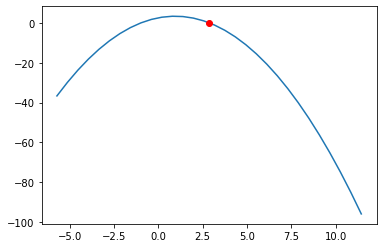

In [2]:
# Método da Secante

from numpy import linspace
from matplotlib.pyplot import plot

def secante(xa,xb,f,tol,nmax,var,plotar):

    f = eval('lambda x:' + f)

    # imprime estimativas iniciais
    print('Estimativas iniciais: xa = {0}; xb = {1} \n'.format(xa,xb))  

    # Loop 
    for i in range(0,nmax):
        
        x = (xa*f(xb) - xb*f(xa))/(f(xb) - f(xa))
                        
        e = abs(x-xb)/abs(x) # erro
        
        # tabela
        print('{0:d}  {1:f}  {2:f}  {3:e}'.format(i,x,f(x),e))
        
        if e < tol:
            break
        xa = xb
        xb = x
        
    if i == nmax:
        print('Solução não obtida em {0:d} iterações'.format(nmax))
    else:
        print('Solução obtida: x = {0:.10f}'.format(x))

    # plotagem
    if plotar:        
        delta = 3*x
        dom = linspace(x-delta,x+delta,30)
        plot(dom,f(dom),x,f(x),'ro')

    return x
      
    
# parametros    
xa = 1.0 # estimativa inicial 1
xb = 2.0 # estimativa inicial 2
tol = 1e-3 # tolerancia
nmax = 100 # numero maximo de iteracoes
f = '-0.9*x**2 + 1.7*x + 2.5'   # funcao
var = 'x'
plotar = True

# chamada da função
xm = secante(xa,xb,f,tol,nmax,var,plotar)

## Problema

Determinar a raiz positiva da equação: $f(x) = \sqrt{x} - 5e^{-x}$, pelo método das secantes com erro inferior a $10^{-2}$. 

### Resolução

Para obtermos os valores iniciais $x_0$ e $x_1$ necessários para iniciar o processo iterativo, dividimos a equação original $f(x) = 0$ em outras duas $y_1$ e $y_2$, com $y_1 = \sqrt{x}$ e $y_2(x) = e^{-x}$, que colocadas no mesmo gráfico, produzem uma interseção próximo a $x = 1.5$. Assim, podemos escolher duas estimativas iniciais próximas deste valor. Podemos escolher $x_0 = 1.4$ e $x_1=1.5$.

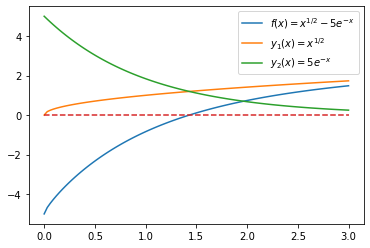

In [3]:
from numpy import sqrt, exp
from matplotlib.pyplot import plot,legend

fx = lambda x: sqrt(x) - 5*exp(-x) 

x = linspace(0,3,100)
plot(x,fx(x),label='$f(x) = x^{1/2} - 5e^{-x}$');
plot(x,sqrt(x),label='$y_1(x) = x^{1/2}$');
plot(x,5*exp(-x),label='$y_2(x) = 5e^{-x}$');
plot(x,fx(x)*0,'--');
legend();

Vejamos o valor de $f(x=1.5)$.

In [4]:
fx(1.5)

0.10909407064943988

Vamos montar uma função anônima para computar o valor da interseção da secante com o eixo $x$, a saber:

In [5]:
xm = lambda a,b: ( a*fx(b) - b*fx(a) ) / (fx(b) - fx(a) )

Vamos usar os nosso valores estimados: 

In [6]:
x0 = 1.4
x1 = 1.5
x2 = round(xm(x0,x1),3) 
print(x2)

1.431


Agora, usamos este novo valor e o anterior.

In [7]:
x3 = round(xm(x1,x2),3)
print(x3)

1.43


Calculemos o erro relativo entre as estimativas $x_1$ e $x_2$:

In [8]:
err = lambda a,b: abs(a - b)/abs(a)
e1 = err(x2,x1)
print(round(e1,3))
print("{0:e}".format(e1))

0.048
4.821803e-02


Agora, calculemos o erro relativo entre as estimativas $x_2$ e $x_3$:

In [9]:
e2 = err(x3,x2)
print(round(e2,3))
print("{0:e}".format(e2))

0.001
6.993007e-04


O erro está diminuindo. Além disso, o valor da raiz está se estabilizando em torno de 1.430. Isto significa que as estimativas iniciais foram muito boas. Com efeito, o uso das interseções proporcionou uma boa escolha.